In [2]:
import numpy as np
import pandas as pd

In [3]:
InfDF = pd.read_csv("~/cbs-covid/src/data/COVID-19_ziekenhuisopnames.csv", delimiter=';')
 # filter data till august 2021, so it matches the data available when the paper was published
InfDF = InfDF[(InfDF['Date_of_statistics'] < '2020-06-02')]

In [4]:
Loc = np.array(InfDF.Municipality_code)
cleanedList = [x for x in range(len(Loc)) if str(Loc[x]) != 'nan']
InfDF = InfDF[InfDF.index.isin(cleanedList)]
InfDF = InfDF.reset_index(drop=True)
InfDF

,Version,Date_of_report,Date_of_statistics,Municipality_code,Municipality_name,Security_region_code,Security_region_name,Hospital_admission_notification,Hospital_admission
0,3,2022-08-18 00:30:00,2020-02-27,GM0014,Groningen,VR01,Groningen,0,0
1,3,2022-08-18 00:30:00,2020-02-27,GM0034,Almere,VR25,Flevoland,0,0
2,3,2022-08-18 00:30:00,2020-02-27,GM0037,Stadskanaal,VR01,Groningen,0,0
3,3,2022-08-18 00:30:00,2020-02-27,GM0047,Veendam,VR01,Groningen,0,0
4,3,2022-08-18 00:30:00,2020-02-27,GM0050,Zeewolde,VR25,Flevoland,0,0
...,...,...,...,...,...,...,...,...,...
33019,3,2022-08-18 00:30:00,2020-06-01,GM1978,Molenlanden,VR18,Zuid-Holland-Zuid,0,0
33020,3,2022-08-18 00:30:00,2020-06-01,GM1979,Eemsdelta,VR01,Groningen,0,0
33021,3,2022-08-18 00:30:00,2020-06-01,GM1980,Dijk en Waard,VR10,Noord-Holland-Noord,0,0
33022,3,2022-08-18 00:30:00,2020-06-01,GM1982,Land van Cuijk,VR21,Brabant-Noord,0,0


In [5]:
daterange = pd.date_range("2020-02-27", "2020-06-01")
doubling_daterange = pd.date_range("2020-03-13", "2020-03-28")

In [32]:
admissions_per_day = np.zeros(daterange.size)
i = 0
for single_date in daterange:
    date = single_date.strftime("%Y-%m-%d")
    admissions = InfDF[InfDF['Date_of_statistics'] == date]['Hospital_admission'].sum()
    admissions_per_day[i] = admissions
    i = i + 1

In [8]:
admissions_per_day_doubling = np.zeros(doubling_daterange.size)
i = 0
for single_date in doubling_daterange:
    date = single_date.strftime("%Y-%m-%d")
    admissions = InfDF[InfDF['Date_of_statistics'] == date]['Hospital_admission'].sum()
    admissions_per_day_doubling[i] = admissions
    i = i + 1

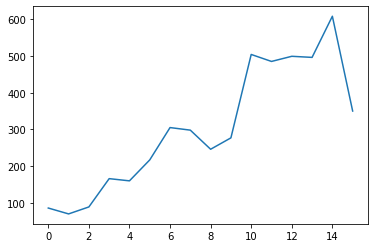

In [9]:
import matplotlib.pyplot as plt
plt.plot(admissions_per_day_doubling)

In [10]:
local_admission_list = ["Eindhoven", "Groningen", "'s-Gravenhage"]

for municipality in local_admission_list:
    admissions_per_day_local = np.zeros(daterange.size)
    i = 0
    for single_date in daterange:
        date = single_date.strftime("%Y-%m-%d")
        admissions = InfDF[(InfDF['Date_of_statistics'] == date) & (InfDF['Municipality_name'] == municipality)]['Hospital_admission'].sum()
        admissions_per_day_local[i] = admissions
        i = i + 1
    np.savetxt(f"observed_hospital_admissions_per_day_{municipality.lower()}.csv", admissions_per_day_local, delimiter=",")


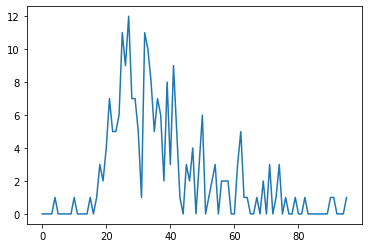

In [8]:
import matplotlib.pyplot as plt
plt.plot(admissions_per_day_eindhoven)

In [36]:
np.savetxt("observed_hospital_admissions_per_day.csv", admissions_per_day, delimiter=",")

In [10]:
np.savetxt("observed_hospital_doubling.csv", admissions_per_day_doubling, delimiter=",")

In [11]:
admissions_per_day_doubling

array([ 86.,  70.,  89., 166., 160., 217., 305., 298., 246., 277., 504.,
       485., 499., 496., 608., 350.])